In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
Data Description The Haberman's survival dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

In [2]:
data = pd.read_csv("haberman.csv", names= ["Age","YearOfOperation","AxilNodes","SurvivalStatus"])

In [3]:
data.head()

,Age,YearOfOperation,AxilNodes,SurvivalStatus
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
data.columns

Index(['Age', 'YearOfOperation', 'AxilNodes', 'SurvivalStatus'], dtype='object')

In [5]:
data.isnull().sum()

Age                0
YearOfOperation    0
AxilNodes          0
SurvivalStatus     0
dtype: int64

In [6]:
data.shape

(306, 4)

In [7]:
data["SurvivalStatus"].value_counts()

1    225
2     81
Name: SurvivalStatus, dtype: int64

From here, we came to know that this is an imbalanced dataset.

In [8]:
data.describe()

,Age,YearOfOperation,AxilNodes,SurvivalStatus
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


Here the mean value of age is 52. And the mean value of axilnodes is 4. The maximum no of axilnodes is 52 while minimum is 0.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              306 non-null    int64
 1   YearOfOperation  306 non-null    int64
 2   AxilNodes        306 non-null    int64
 3   SurvivalStatus   306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


OBSERVATION: All the values are int64. Number of independent variables are 3 i.e. Age, YearOfOperation and AxilNodes while the dependent one is SurvivalStatus

OBJECTIVE: We have to classify the patients will survive more than 5 years or not.

Analysis:
1. Univariate Analysis: PDF, CDF, boxplot, violin plots
2. Bivariate Analysis: Scatter plot, pairplot
3. Multivariate Analysis: Contours

E:\New folder\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


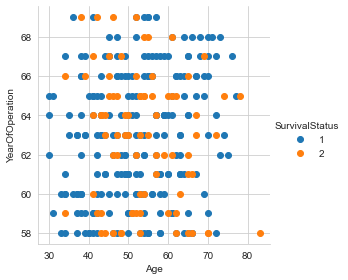

In [10]:
sns.set_style("whitegrid");
sns.FacetGrid(data, hue="SurvivalStatus", size=4) \
   .map(plt.scatter, "Age", "YearOfOperation") \
   .add_legend();
plt.show();

Obseravtions:

30-40 age interval: More chances of survival

40-70 age interval: Almost eqaul chances of survival and non survival

70-80 age interval: More chances of survival

Aboe 80: Most likely to die

E:\New folder\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


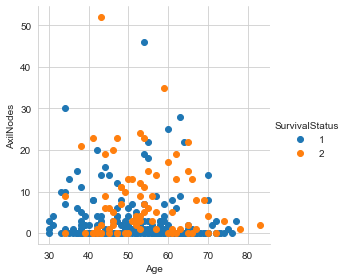

In [11]:
sns.set_style("whitegrid");
sns.FacetGrid(data, hue="SurvivalStatus", size=4) \
   .map(plt.scatter, "Age", "AxilNodes") \
   .add_legend();
plt.show();

Observation:

When axilnodes< 20 & 30<age<=40 then the chances of survival are much more.

When axilnodes< 10 & 40<age<=70 then the chances of survival and non survival are almost the same.

When axilnodes< 10 & 60<age<=70 then the chances of non survival are more.

When 10<axilnodes< 20 & 30<age<=50 then the chances of survival are more.

When 10<axilnodes< 20 & 50<age<=70 then the chances of non survival are more.

E:\New folder\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


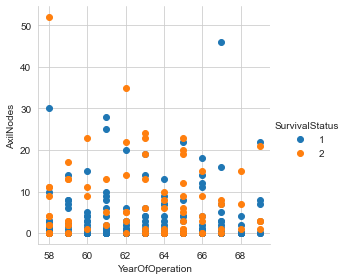

In [12]:
sns.set_style("whitegrid");
sns.FacetGrid(data, hue="SurvivalStatus", size=4) \
   .map(plt.scatter, "YearOfOperation", "AxilNodes") \
   .add_legend();
plt.show();

Cannot infer anything from this plot, except that for the year 1960-61 there is more chance of survival when axilnodes<20

E:\New folder\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


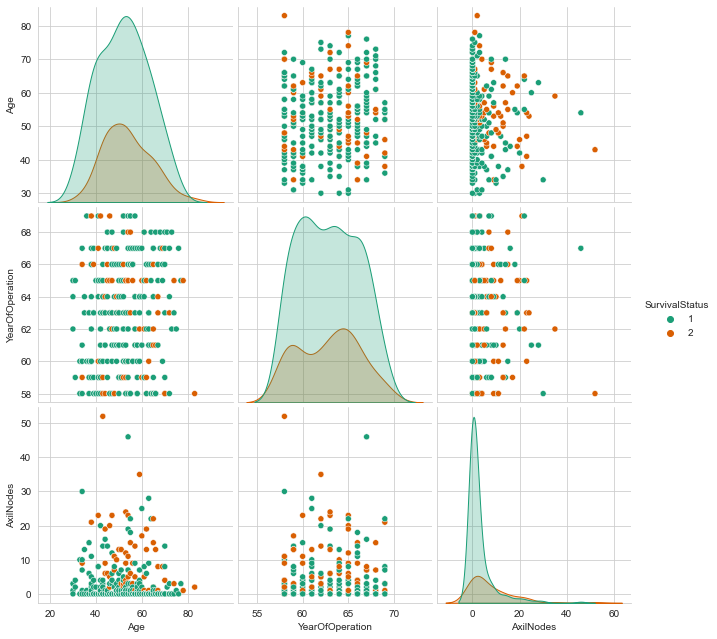

In [22]:
sns.set_style("whitegrid")
sns.pairplot(data, hue="SurvivalStatus", palette="Dark2" ,size=3)
plt.show()

Observation:

1. From fig in (row 1,col 3), it is clear that if the number of axilnods is very less roughly between(0-5), then the chances of survival are more.

2. Age and Axilnodes turned out to be the more important factors in determining the survival.

E:\New folder\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


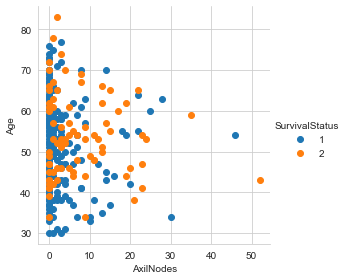

In [23]:
sns.FacetGrid(data, hue="SurvivalStatus", size=4)\
.map(plt.scatter, "AxilNodes","Age")\
.add_legend()

E:\New folder\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
E:\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


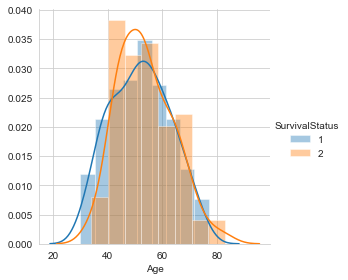

In [25]:
sns.FacetGrid(data, hue="SurvivalStatus", size=4)\
.map(sns.distplot, "Age")\
.add_legend()
plt.show()

As we can see that there is a lot of overlapping between the persons surviving and dying, so not much can be concluded.

E:\New folder\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
E:\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


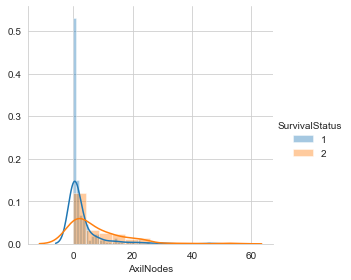

In [30]:
sns.FacetGrid(data, hue="SurvivalStatus", size=4)\
.map(sns.distplot, "AxilNodes")\
.add_legend()
plt.show()

We can see that maximum survival occurs when the number of axilnodes is 0-1, and survival rate is gradually declining.
But when the axilnodes>20, there is more chance of death.

In [31]:
People_survived= data.loc[data["SurvivalStatus"]==1]
People_not_survived= data.loc[data["SurvivalStatus"]==2]

In [33]:
People_survived.shape

(225, 4)

In [34]:
People_not_survived.shape

(81, 4)

In [40]:
print(np.mean(People_survived['Age']))
print(np.mean(People_not_survived['Age']))

52.01777777777778
53.67901234567901


In [41]:
print(np.mean(People_survived['AxilNodes']))
print(np.mean(People_not_survived['AxilNodes']))

2.7911111111111113
7.45679012345679


In [43]:
print(np.median(People_survived['Age']))
print(np.median(People_not_survived['Age']))

52.0
53.0


In [44]:
print(np.median(People_survived['AxilNodes']))
print(np.median(People_not_survived['AxilNodes']))

0.0
4.0


Observations:
    
1. Axilnodes is more informative than other two features.
2. While there is difference in values between mean and median of Axilnodes, indicating some outliers.

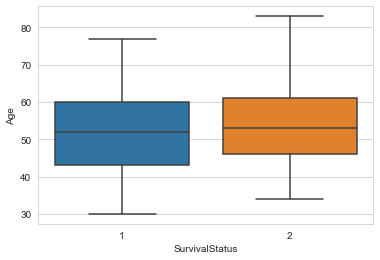

In [46]:
sns.boxplot(x='SurvivalStatus',y='Age', data=data)
plt.show()

Observation:
    
1. There are no outliers and much can be derived from this plot.
2. Age of survival lies between(42-60)
3. Age of non survival lies between(45-61)

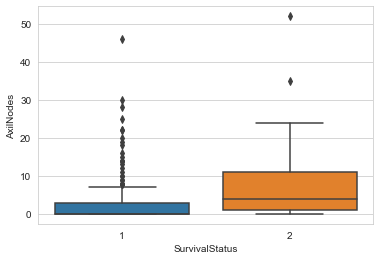

In [48]:
sns.boxplot(x='SurvivalStatus',y='AxilNodes', data=data)
plt.show()

Observation:
    
1. There are a lot of outliers so median is preferred over mean.
2. AxilNodes of survival lies between(0-4)
3. Age of non survival lies between(2-11)

Final Conclusion:
1. The important features to study are Age and AxilNodes.
2. If Age lies in the interval(30-40) and the number of AxilNodes lie in (0,10), then the chances of survival are more.
3. If Age lies in the interval(30-48) and the number of AxilNodes lie in (10,20), then the chances of survival are more.
4. If Age lies in the interval(50-70) and the number of AxilNodes lie in (10,20), then the chances of non-survival are more.
5. If Age lies in the interval(70-80), then the chances of survival are more.
6. If Age is greater than 80, then the chances of non-survival are more.
7. If AxilNodes lies in the interval(0-1), then there is maximum chance of survival.

Suggestions are always welcome!

Being a beginner,I will appreciate if you can give a read and review my notebook.Please upvote,if you like my work.It will boost my confidence.

Thank You.